In [1]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import gymnasium as gym
import torch
import imageio
import numpy as np
from model.utils import setup_training, get_config_path,get_record_path,write_config_to_yaml,gen_seeds,make_env
from model.models import DiscreteActor, ContinuousActor
import os
import pandas as pd
import yaml

In [2]:

config_file = "LunarLanderC"
config_path = get_config_path(config_file)
args = setup_training(config_path)

DEVICE=torch.device("cpu")
if config_file == "LunarLanderC":
    env = gym.make(args.env_name,render_mode='rgb_array',continuous=True)

else:env = gym.make(args.env_name,render_mode='rgb_array')


if args.is_continuous:
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]
    actor = ContinuousActor(n_wires=args.n_wires,
                                    n_blocks=args.n_blocks,
                                    input_dim=state_dim,
                                    output_dim=action_dim,
                                    ini_method=args.ini_method,is_quantum=True).to(DEVICE)
else:
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n
    actor = DiscreteActor(n_wires=args.n_wires,
                                n_blocks=args.n_blocks,
                                input_dim=state_dim,
                                output_dim=action_dim,
                                ini_method=args.ini_method,is_quantum=True).to(DEVICE)
    
actor.load_state_dict(torch.load("./records/LunarLander-v3Continuous_nwires4_nblocks1_wc0/PPO_actor/exp0.pt"))

<All keys matched successfully>

In [4]:
config_file = "LunarLander"
config_path = get_config_path(config_file)
args = setup_training(config_path)
DEVICE=torch.device("cpu")
if config_file == "LunarLanderC":
    env = gym.make(args.env_name,render_mode='rgb_array',continuous=True)

else:env = gym.make(args.env_name,render_mode='rgb_array')
args.max_episode_steps = env._max_episode_steps

args.state_dim = env.observation_space.shape[0]
args.action_dim = env.action_space.n

seeds = gen_seeds(args)
envs = gym.vector.AsyncVectorEnv(
    [make_env(args, seed=seeds[i], is_continuous=args.is_continuous) for i in range(args.num_envs)]
)

In [ ]:
env.action_space

4

In [31]:


obs,info = envs.reset()
done = False
while not truncated.any():
    obs_tensor = torch.tensor(obs, dtype=torch.float32)
    if len(obs_tensor.shape) == 1:
        obs_tensor = obs_tensor.unsqueeze(0)
    with torch.no_grad():
        dist = actor.get_dist(obs_tensor)
        a = dist.sample().cpu().numpy()

    if args.is_continuous:
        action = envs.action_space.low + (a - np.zeros_like(a)) * (
                    envs.action_space.high - envs.action_space.low)
        
    obs, reward, terminated, truncated, info = envs.step(action)
    done = np.logical_or(terminated, truncated)
    print(info)

{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'episode': {'r': array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       255.72793716,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.     

KeyboardInterrupt: 

In [ ]:
{'episode': {'r': array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       255.72793716,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ]), '_r': array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False]), 'l': array([  0,   0,   0,   0,   0,   0,   0,   0, 246,   0,   0,   0,   0,
         0,   0,   0]), '_l': array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False]), 't': array([0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 2.070053, 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      ]), '_t': array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False])}, '_episode': array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False])}

In [4]:
frames = []
obs,_ = env.reset()
done = False
while not done:
    obs_tensor = torch.tensor(obs, dtype=torch.float32).unsqueeze(0)
    with torch.no_grad():
        dist = actor.get_dist(obs_tensor)
        a =dist.mode.numpy()

    if args.is_continuous:
        action = env.action_space.low + (a - np.zeros_like(a)) * (
                    env.action_space.high - env.action_space.low)
        
    action = action.squeeze(0)
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # 获取渲染帧
    frame = env.render()
    frames.append(frame)

env.close()

imageio.mimsave(f"./gifs/{config_file}.gif", frames, duration=1/30)  # 30 FPS

In [ ]:
#tensorboard --logdir=路径  
#查看 runs中的数据

In [6]:
def load_exps(folder_name):
    folder_path = 'records/' + folder_name + '/csvs/'
    if not os.path.isdir(folder_path):
        print(f"文件夹不存在{folder_path}")
    data_list = []
    i = 0
    while True:
        subfolder = f'exp{i}'
        subfolder_path = os.path.join(folder_path, subfolder)


        if not os.path.isdir(subfolder_path):
            print(f"目录不存在，停止：{subfolder_path}")
            break
        return_path = os.path.join(subfolder_path, 'charts_episodic_return.csv')
        if os.path.isfile(return_path):
            df = pd.read_csv(return_path)
            data_list.append(df)
        else:
            print(f"未找到文件: {return_path}")
        i += 1
    return data_list

def get_mean_std(data_list):
    x_list = [data_list[i]['step'].values for i in range(len(data_list))]
    y_list = [data_list[i]['value'].values for i in range(len(data_list))]
    y_combined = []
    all_x = set()
    for x in x_list:
        all_x.update(x)
    sorted_x = np.sort(np.array(list(all_x)))
    for x, y in zip(x_list, y_list):
        interp_y = np.interp(sorted_x, x, y)
        y_combined.append(interp_y)
    y_matrix = np.array(y_combined)
    y_mean = np.mean(y_matrix, axis=0)
    y_std = np.std(y_matrix, axis=0)

    return [sorted_x,y_mean,y_std]
    

In [13]:
data_list_h = load_exps('Pendulum-v1_nwires3_nblocks2_wc0')
config_file = "Pendulum"

目录不存在，停止：records/Pendulum-v1_nwires3_nblocks2_wc0/csvs/exp10


In [10]:
xy_list_h = get_mean_std(data_list_h)

In [11]:
data_list_c = load_exps('Pendulum-v1_nwires3_nblocks2_wc1')
xy_list_c = get_mean_std(data_list_c)

目录不存在，停止：records/Pendulum-v1_nwires3_nblocks2_wc1/csvs/exp10


In [12]:
xy_list_h[2].mean()

267.8993464137069

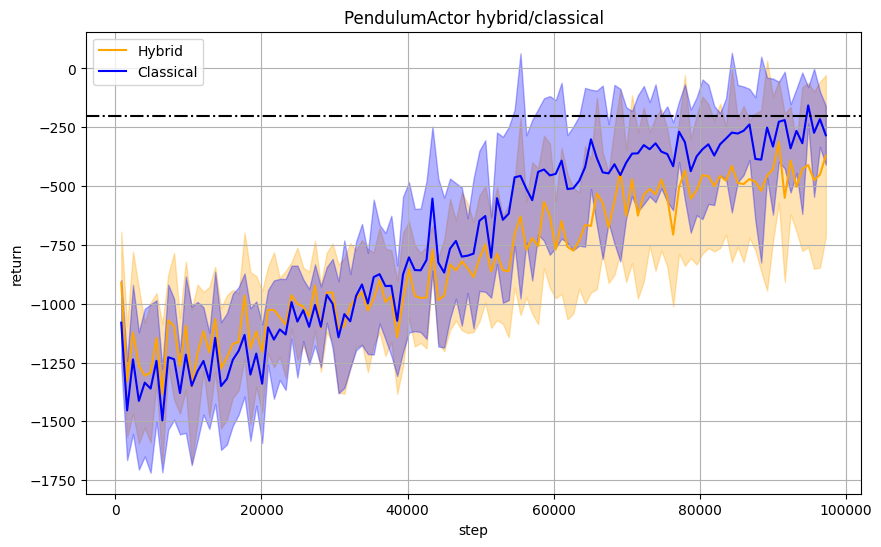

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(xy_list_h[0], xy_list_h[1], label='Hybrid', color='orange')
plt.fill_between(xy_list_h[0], xy_list_h[1] - xy_list_h[2], xy_list_h[1] + xy_list_h[2], color='orange', alpha=0.3)
plt.plot(xy_list_c[0], xy_list_c[1], label='Classical', color='blue')
plt.fill_between(xy_list_c[0], xy_list_c[1] - xy_list_c[2], xy_list_c[1] + xy_list_c[2], color='blue', alpha=0.3)
plt.axhline(-200,linestyle='-.',color='black')
plt.xlabel('step')
plt.ylabel('return')
plt.title(config_file+'Actor hybrid/classical')
plt.grid(True)
plt.legend()
# plt.xlim(0.0,100000)
plt.show()